In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import spikeinterface.toolkit as st

from probeinterface import generate_linear_probe
from probeinterface.plotting import plot_probe
from mpi4py import MPI


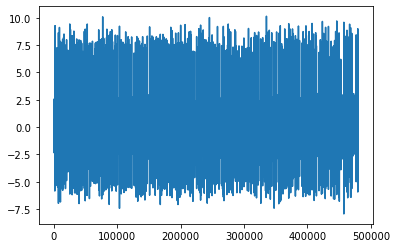

In [6]:

data = sio.loadmat('M7_S1_n0.1.mat')

data = data['signal']

temp_numpyArray = np.array(data)





#print(type(numpyArray), type(numpyArray[0]), type(numpyArray[0][0]))

arrSize = int(np.shape(temp_numpyArray)[1])

numpyArray=np.ndarray(shape=(arrSize,1), dtype=float)
xArray=[0 for i in range(arrSize)]
yArray=[0 for i in range(arrSize)]
for i in range(arrSize):
    numpyArray[i][0] = temp_numpyArray[0][i] * 10
    xArray[i]=i
    yArray[i] = temp_numpyArray[0][i] * 10
    
plt.plot(xArray,yArray) 



In [12]:

num_channels = 1
sampling_frequency = 48000.  # in Hz
durations = [10.]  #  in s for 1 segments
#num_segments = 2
num_timepoints = [int(sampling_frequency * d) for d in durations] 

##############################################################################
# We can generate a pure-noise timeseries dataset for 2 segments with 2
# different durations:

#traces0 = np.random.normal(0, 10, (num_timepoints[0], num_channels))


##############################################################################
# And instantiate a :py:class:`~spikeinterface.core.NumpyRecording`. Each object has a pretty print to
# summarize its content:

recording = se.NumpyRecording(traces_list=[numpyArray], sampling_frequency=sampling_frequency)
r = st.preprocessing.bandpass_filter(recording, freq_min=300, freq_max=6000)


TypeError: __init__() got an unexpected keyword argument 'filter_type'

In [ ]:

probe = generate_linear_probe(num_elec=num_channels, ypitch=20, contact_shapes='circle')

probe.set_device_channel_indices(np.arange(num_channels))

recording = recording.set_probe(probe)
plot_probe(probe)



threshold_= 5

sorting_TDC = ss.run_tridesclous(recording,detect_threshold = threshold_)
sorting_SC = ss.run_spykingcircus(recording,detect_threshold = threshold_)

In [ ]:
print(sorting_TDC)
print(sorting_SC)



cmp_SC_TDC = sc.compare_two_sorters(
    sorting1=sorting_SC,
    sorting2=sorting_TDC,
    sorting1_name='SC',
    sorting2_name='TDC',
)





In [ ]:
sw.plot_agreement_matrix(cmp_SC_TDC)
print(cmp_SC_TDC.match_event_count)
print(cmp_SC_TDC.agreement_scores)

sc_to_tdc, tdc_to_sc = cmp_SC_TDC.get_matching()

print('matching SC to TDC')
print(sc_to_tdc)
print('matching TDC to SC')
print(tdc_to_sc)




In [ ]:
print(vars(sorting_SC))